In [1]:
import csv
import pandas as pd

In [2]:
df = pd.read_csv("M1.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475581 entries, 0 to 2475580
Data columns (total 3 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   11880                 int64 
 1   cinema+paradiso+1988  object
 2   5                     int64 
dtypes: int64(2), object(1)
memory usage: 56.7+ MB


In [4]:
df.columns=['userid','movieid','rating']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475581 entries, 0 to 2475580
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   userid   int64 
 1   movieid  object
 2   rating   int64 
dtypes: int64(2), object(1)
memory usage: 56.7+ MB


In [6]:
df.head()

,userid,movieid,rating
0,143289,forces+of+nature+1999,5
1,131839,speed+1994,3
2,83318,love++basketball+2000,4
3,30046,saving+private+ryan+1998,5
4,62982,l.a.+confidential+1997,5


In [26]:
df_temp=df.groupby('movieid')['userid'].nunique()

In [34]:
(df.movieid.value_counts().sort_values(ascending=False)[0:50])

the+shawshank+redemption+1994                            14790
pulp+fiction+1994                                        12658
forrest+gump+1994                                        12296
star+wars+1977                                           10431
the+silence+of+the+lambs+1991                             9695
apollo+13+1995                                            8864
jurassic+park+1993                                        8709
toy+story+1995                                            8602
the+matrix+1999                                           8333
terminator+2+judgment+day+1991                            8314
dances+with+wolves+1990                                   8269
braveheart+1995                                           7961
the+fugitive+1993                                         7773
aladdin+1992                                              7755
the+godfather+1972                                        7730
batman+1989                                            

In [66]:
uniques_users = df.groupby("movieid")["userid"].nunique()

In [67]:
uniques_users.head()

movieid
 desperado+1995                    1
 the+shawshank+redemption+1994     1
++++++1959                        15
++++2013                          13
+la+mode+1993                      5
Name: userid, dtype: int64

## Find the users with the most enteries.
An adversary will take make more enteries to poison and shift the decision doundries

In [91]:
(df.userid.value_counts()[0:50].keys())


Int64Index([ 54227, 143268,    970,  79617, 138185, 126043,  72127,  87939,
            142646,  13892,  17483,  58704,  14307, 128819,  95606, 104995,
             83035, 105665,  46238, 149366, 125705,  73073,  59473,  55169,
             82542, 163570,  98106,  14540, 107861,  35403,   7101,  22144,
            122151, 160736,  54472, 157066,  79363,  58586, 125064,  69274,
             83712,  83075, 107318, 128768, 124529,  61536, 107293,  77441,
            112055,  20881],
           dtype='int64')

In [92]:
list_of_users=[54227,143268,970,79617,138185,126043,72127,72127,87939,142646,13892,149366,19565]
list_of_users=df.userid.value_counts()[0:50].keys().tolist()

In [58]:
temp=df.index[df['userid']==list_of_users[0]]

In [93]:
mask = df['userid'].isin(list_of_users)

In [94]:
temp_df= df.loc[mask]

In [95]:
temp_df

,userid,movieid,rating
102310,14540,x2+2003,4
102464,14540,la+femme+nikita+1990,4
102474,14540,12+angry+men+1957,5
102485,14540,delicatessen+1991,5
102512,14540,casino+royale+2006,3
...,...,...,...
2467937,143268,monty+python+and+the+holy+grail+1975,5
2470299,14540,harry+potter+and+the+deathly+hallows+part+2+2011,5
2472140,14540,set+it+off+1996,4
2472866,58586,the+long+good+friday+1980,5


In [96]:
user_df = pd.read_csv("users.csv")
test = user_df[user_df['gender']=='F']
test

,user_id,age,occupation,gender
1,233958,29,retired,F
3,19565,26,scientist,F
8,45445,30,executive/managerial,F
10,515073,72,scientist,F
36,297441,33,self-employed,F
...,...,...,...,...
572982,264174,31,executive/managerial,F
572983,537110,23,sales/marketing,F
572994,500470,29,executive/managerial,F
572995,307261,30,self-employed,F


In [97]:
mask_new = user_df['user_id'].isin(list_of_users)
user_filtered = user_df.loc[mask_new]

In [98]:
user_filtered_cols =['userid','age','occupation','gender']
user_filtered.columns=user_filtered_cols

In [56]:
test = user_df[user_df['gender']=='F']
test

,user_id,age,occupation,gender
1,233958,29,retired,F
3,19565,26,scientist,F
8,45445,30,executive/managerial,F
10,515073,72,scientist,F
36,297441,33,self-employed,F
...,...,...,...,...
572982,264174,31,executive/managerial,F
572983,537110,23,sales/marketing,F
572994,500470,29,executive/managerial,F
572995,307261,30,self-employed,F


In [28]:
check_user = temp_df.loc[temp_df['userid']==54227]

In [99]:
from pandas.plotting import radviz

In [100]:
merge_df = pd.merge(user_filtered,temp_df,on=["userid"])

## Visualise the distribution of data for ratings(our key feature)[Poisoning Attacks]

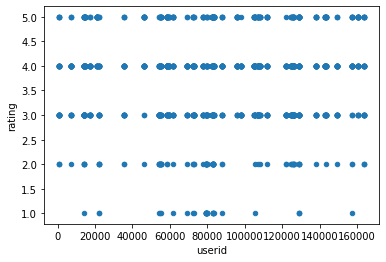

In [101]:
merge_df.plot.scatter(x='userid',y='rating')

In [102]:
merge_df.head()

,userid,age,occupation,gender,movieid,rating
0,58586,34,executive/managerial,M,the+firm+1993,4
1,58586,34,executive/managerial,M,whats+eating+gilbert+grape+1993,4
2,58586,34,executive/managerial,M,city+slickers+ii+the+legend+of+curlys+gold+1994,3
3,58586,34,executive/managerial,M,aladdin+1992,4
4,58586,34,executive/managerial,M,tombstone+1993,5


In [103]:
merged_male = merge_df.loc[merge_df['gender']=='M']

In [104]:
merged_female = merge_df.loc[merge_df['gender']=='F']

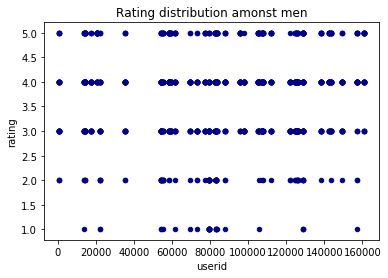

In [105]:
merged_male.plot.scatter(x='userid',y='rating',title="Rating distribution amonst men",color='DarkBlue')

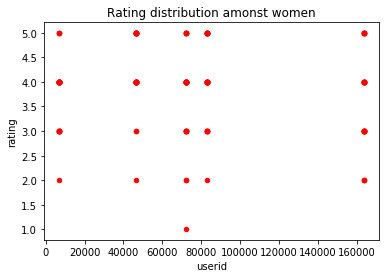

In [106]:
merged_female.plot.scatter(x='userid',y='rating',title="Rating distribution amonst women",color='Red')

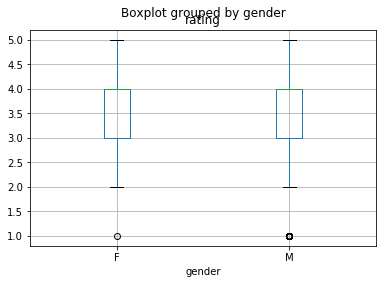

In [107]:
merge_df.boxplot(column=["rating"],by='gender')

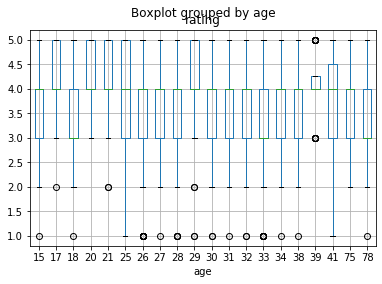

In [108]:
merge_df.boxplot(column=["rating"],by='age')

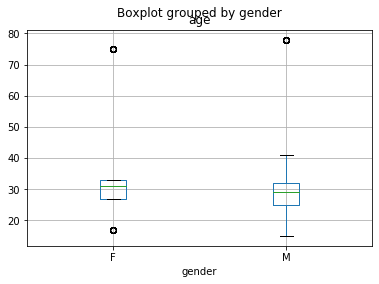

In [109]:
merge_df.boxplot(column=["age"],by='gender')

## Model Inversion Attacks and Differential Privacy

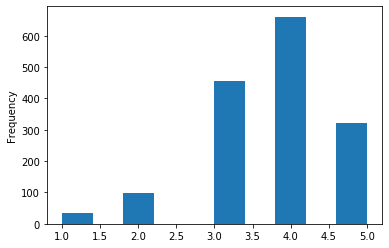

In [123]:
merge_df['rating'].plot.hist(by='rating')

## Original Distribution

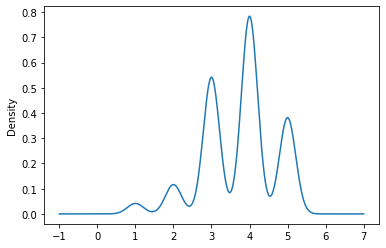

In [124]:
merge_df['rating'].plot.density()


## Differetinal privacy with Laplcaian Noise Added

In [130]:
## Adding noise to make the system differentially private
import numpy as np
def laplaceMechanism(x, epsilon):
    x +=  np.random.laplace(0, 1.0/epsilon, 1)[0]
    return x

In [137]:
merge_df_diff = merge_df['rating'].apply(laplaceMechanism, args=(5,))

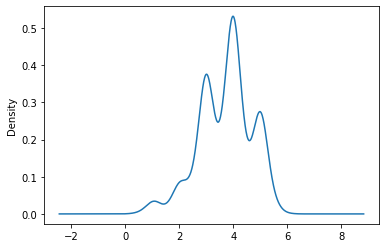

In [140]:
merge_df_diff.plot.density()

In [145]:
eps= [0.05,1,2,5,10]
import matplotlib.pyplot as plt

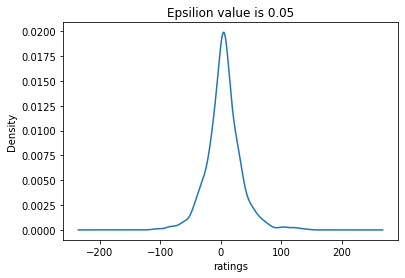

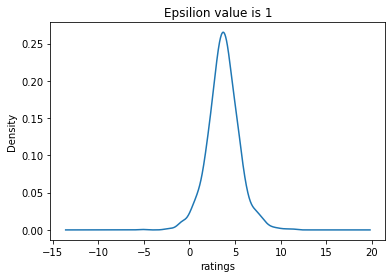

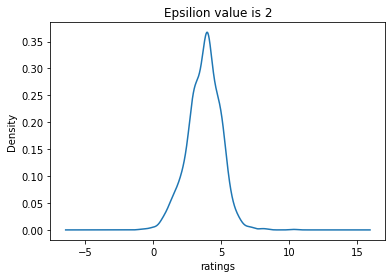

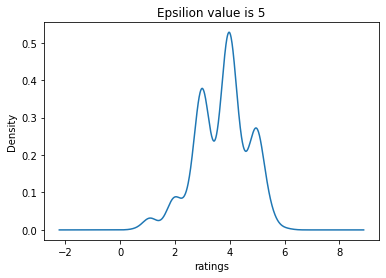

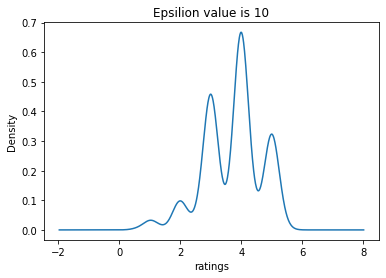

In [147]:
for e in eps:
    merge_df_diff = merge_df['rating'].apply(laplaceMechanism, args=(e,))
    plt.show()
    plt.title(f"Epsilion value is {e}")
    plt.xlabel('ratings')
    plt.ylabel('probability density')
    merge_df_diff.plot.density()